# Solving the heat equation with full space-time FEM

## Uniform mesh

Solving linear variational problem.


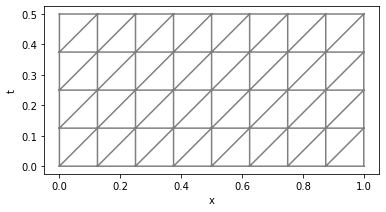

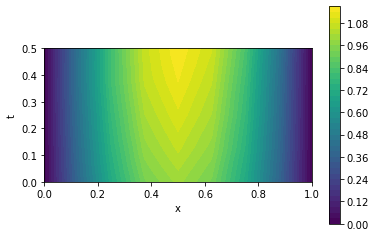

In [1]:
import dolfin
from fenics import *
import matplotlib.pyplot as plt
import math

# define space-time mesh
t0 = 0. # start time
T = 0.5 # end time
x_min = 0.
x_max = 1.
n_time = 4
n_space = 8

# coordinates: (x,t)
mesh = RectangleMesh(Point(x_min, t0), Point(x_max, T), n_space, n_time)

V = FunctionSpace(mesh, 'P', 1)

# Analytical solution U is used as Dirichlet BC for x ∈ ∂Ω = {x_min, x_max} or t = t0
U = Expression('sin(pi*x[0])*(1.+x[1])*exp(-0.5*x[1])', degree=2, pi=math.pi)
bc = DirichletBC(V, U, lambda x, on_boundary: (near(x[0], x_min) or near(x[0], x_max) or near(x[1], t0)) and on_boundary)

# Define variational problem
f = Expression('sin(pi*x[0])*exp(-0.5*x[1])*(0.5+pow(pi,2)+(pow(pi,2)-0.5)*x[1])', degree=2, pi=math.pi)
u = TrialFunction(V)
v = TestFunction(V)
a = grad(u)[1]*v*dx + grad(u)[0]*grad(v)[0]*dx
L = f*v*dx

# Solve
u_h = Function(V)
solve(a == L, u_h, bcs=bc)

# Plot solution
plot(mesh) # Coarse mesh
plt.gca().set(xlabel="x", ylabel="t")
plt.show()
#plt.savefig("Coarse_mesh.svg")
c = plot(u_h) # Solution on coarse mesh
plt.colorbar(c)
plt.gca().set(xlabel="x", ylabel="t")
plt.show()
#plt.savefig("Coarse_solution.svg")

## Adaptive mesh

eq.lhs =  { (grad(v_1))[1] * v_0 } * dx(<Mesh #22>[everywhere], {})
  +  { (grad(v_0))[0] * (grad(v_1))[0] } * dx(<Mesh #22>[everywhere], {})  eq.rhs= { v_0 * f_29 } * dx(<Mesh #22>[everywhere], {})
Generating forms required for error control, this may take some time...
Solving variational problem adaptively
Adaptive iteration 0
  Solving linear variational problem.
  Value of goal functional is 0.292935.
  Solving linear variational problem.
  Interpolate from parent to child
Adaptive iteration 1
  Solving linear variational problem.
  Value of goal functional is 0.298818.
  Solving linear variational problem.
  Interpolate from parent to child
Adaptive iteration 2
  Solving linear variational problem.
  Value of goal functional is 0.299932.
  Solving linear variational problem.
  Interpolate from parent to child
Adaptive iteration 3
  Solving linear variational problem.
  Value of goal functional is 0.3006.
  Solving linear variational problem.
  Interpolate from parent to child
Adap

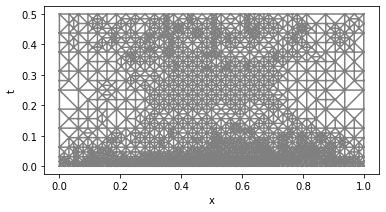

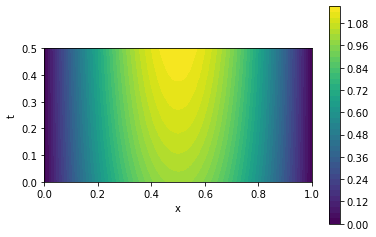

In [2]:
import dolfin
from fenics import *
import matplotlib.pyplot as plt
import math

t0 = 0. # start time
T = 0.5 # end time
x_min = 0.
x_max = 1.
n_time = 4
n_space = 8

# coordinates: (x,t)
mesh = RectangleMesh(Point(x_min, t0), Point(x_max, T), n_space, n_time)

V = FunctionSpace(mesh, 'P', 1)

# Analytical solution U is used as Dirichlet BC for x ∈ ∂Ω = {x_min, x_max} or t = t0
U = Expression('sin(pi*x[0])*(1.+x[1])*exp(-0.5*x[1])', degree=2, pi=math.pi)
bc = DirichletBC(V, U, lambda x, on_boundary: (near(x[0], x_min) or near(x[0], x_max) or near(x[1], t0)) and on_boundary)

# Define variational problem
f = Expression('sin(pi*x[0])*exp(-0.5*x[1])*(0.5+pow(pi,2)+(pow(pi,2)-0.5)*x[1])', degree=2, pi=math.pi)
u = TrialFunction(V)
v = TestFunction(V)
a = grad(u)[1]*v*dx + grad(u)[0]*grad(v)[0]*dx
L = f*v*dx

# Solve
u_h = Function(V)
# Goal functional
M = u_h**2*dx()
solve(a == L, u_h, bcs=bc, tol=1e-4, M=M)

# Plot solution
plot(u_h.leaf_node().ufl_function_space().mesh()) # Final mesh
plt.gca().set(xlabel="x", ylabel="t")
plt.show()
#plt.savefig("Adaptive_mesh.svg")
c = plot(u_h.leaf_node()) # Solution on final mesh
plt.colorbar(c)
plt.gca().set(xlabel="x", ylabel="t")
plt.show()
#plt.savefig("Adaptive_solution.svg")